In [1]:
from sklearn.cross_validation import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import sklearn.preprocessing as preprocess
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn import svm

C:\Users\karan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\karan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Reading the file From Github Repo

In [2]:
#df = pd.read_csv("training.csv")
#df = pd.read_csv("C:/Users/KARAN/Desktop/train.csv")

df = pd.read_csv("https://raw.githubusercontent.com/karan95verma/Perdiction_of_Ads/master/training.csv")

In [3]:
print (df)

                ID          datetime     siteid  offerid  category  merchant  \
0        IDsrk7SoW  14-01-2017 09:42  4709696.0   887235     17714  20301556   
1        IDmMSxHur  18-01-2017 17:50  5189467.0   178235     21407   9434818   
2        IDVLNN0Ut  11-01-2017 12:46    98480.0   518539     25085   2050923   
3        ID32T6wwQ  17-01-2017 10:18  8896401.0   390352     40339  72089744   
4        IDqUShzMg  14-01-2017 16:02  5635120.0   472937     12052  39507200   
5        IDjO9XQ1Z  14-01-2017 12:08  2729292.0   961176     33638  47079934   
6        IDUuVWVrO  12-01-2017 13:07  7007059.0   664666     68847  58604466   
7        IDFnmhUgG  13-01-2017 05:58  7295565.0   144797     33638  23981625   
8        IDeFBJfzG  18-01-2017 13:00  2116058.0   376073     15912  30860214   
9        IDmyijsRf  14-01-2017 12:38  5329483.0   952097     89680  74363610   
10       IDGQGYgdk  14-01-2017 11:06  6436389.0   949077     76239  65017662   
11       IDeS7iMpY  12-01-2017 03:36  64

In [4]:
df_zero = df[df['click']==0]
df_one = df[df['click']==1]
df_zero = df_zero[:2500]
df_one = df_one[:2500]
print(len(df_zero))
print(len(df_one))

2500
2500


In [5]:
df_zero.head()

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
0,IDsrk7SoW,14-01-2017 09:42,4709696.0,887235,17714,20301556,e,Firefox,NaN,0
1,IDmMSxHur,18-01-2017 17:50,5189467.0,178235,21407,9434818,b,Mozilla Firefox,Desktop,0
2,IDVLNN0Ut,11-01-2017 12:46,98480.0,518539,25085,2050923,a,Edge,NaN,0
3,ID32T6wwQ,17-01-2017 10:18,8896401.0,390352,40339,72089744,c,Firefox,Mobile,0
4,IDqUShzMg,14-01-2017 16:02,5635120.0,472937,12052,39507200,d,Mozilla Firefox,Desktop,0


In [6]:
df_combined = df_one.append(df_zero,ignore_index=True)
print (df_combined)

             ID          datetime     siteid  offerid  category  merchant  \
0     IDdPZWVCs  15-01-2017 21:43  6718234.0   433512     43612  57517812   
1     IDU8ukCsv  10-01-2017 15:28   469603.0   385750     93286   7122654   
2     IDfEQxvi3  14-01-2017 19:01  5369414.0   513860     27655  92826840   
3     IDbF2aKjs  11-01-2017 19:21  6005717.0   956737      1678  60293830   
4     IDEgpeME8  16-01-2017 14:29  7979331.0   501647     68947  58321067   
5     ID0SqwVVC  17-01-2017 00:04  2092870.0   400635     43897  46512126   
6     IDN439rpK  20-01-2017 12:49    94250.0   527842     23576  16150900   
7     IDd9dRKG1  15-01-2017 01:00  7885100.0   913591     15912   7181598   
8     IDA9DGtL9  15-01-2017 06:30  9335708.0   188867      3643    555603   
9     IDLM0u0QM  16-01-2017 02:56  5571806.0   103249     40339  43452411   
10    IDY7aCYRs  13-01-2017 13:25  8476528.0   945081     41706   4000296   
11    IDLBtW0hS  13-01-2017 20:05  2148269.0   995962     80554   7122654   

In [7]:
from sklearn.utils import shuffle
df_new = shuffle(df_combined)
print(df_new)

             ID          datetime     siteid  offerid  category  merchant  \
3615  IDGev7Hqh  11-01-2017 08:43  5449810.0   543897     80692  74868704   
1319  ID87IfZvC  20-01-2017 09:00  8674669.0   738456     22023  48644561   
4139  IDEoIlQ1b  15-01-2017 08:26  7948446.0   618774     53956  52437512   
3904  IDn1Kpx69  16-01-2017 14:22  4032920.0   406070     15912   7864011   
2330  IDVAYtRkn  19-01-2017 03:07  3539408.0    41436      5602  72451969   
1010  IDTvQksXC  19-01-2017 21:57  4985579.0   600754     43897  18243870   
4125  ID2UO881a  11-01-2017 05:26  9489992.0   466538     70384  14032724   
4813  IDsw6PDWz  14-01-2017 15:34  1901017.0   220446     66786  20301556   
2978  IDweXr48M  14-01-2017 09:06  3544355.0   889613     93286  94930037   
4991  ID78RP97n  17-01-2017 02:46   187884.0   212836      6906  71165566   
3270  IDNfp8mab  11-01-2017 19:04  4974141.0   187621     10345  26461535   
2312  ID9MOz2Xa  12-01-2017 14:31   219304.0   988312     61208  39603421   

In [91]:
#data = df[:5000]
#print(data)

In [92]:
#click_new = [0] * 5000 + [1] * 5000
#from random import shuffle
#shuffle(click_new)
#print(click_new)
#click_new = [0] * 2500 + [1] * 2500
#from random import shuffle
#click_new = shuffle(click_new)
#print(click_new)

In [80]:
#df_new['click'] = click_new

In [8]:
df_new['click'].value_counts()

1    2500
0    2500
Name: click, dtype: int64

In [9]:
df_new.isnull().sum()

ID               0
datetime         0
siteid         515
offerid          0
category         0
merchant         0
countrycode      0
browserid      267
devid          761
click            0
dtype: int64

In [10]:
print((df_new["siteid"].isnull().sum())/len(df_new["siteid"])) 
print((df_new["browserid"].isnull().sum())/len(df_new["browserid"]))
print((df_new["devid"].isnull().sum())/len(df_new["devid"]))
                                       

0.103
0.0534
0.1522


In [11]:
df_new['siteid'].mode()
df_new['browserid'].mode()
df_new['devid'].mode()
#data = data.dropna(axis=0)
#print(data["devid"])

0    Mobile
dtype: object

In [12]:
df_new["siteid"]=df_new["siteid"].fillna(1466152.0)
df_new["browserid"]=df_new["browserid"].fillna('Edge')
df_new["devid"]=df_new["devid"].fillna('Mobile')
print(df_new)


             ID          datetime     siteid  offerid  category  merchant  \
3615  IDGev7Hqh  11-01-2017 08:43  5449810.0   543897     80692  74868704   
1319  ID87IfZvC  20-01-2017 09:00  8674669.0   738456     22023  48644561   
4139  IDEoIlQ1b  15-01-2017 08:26  7948446.0   618774     53956  52437512   
3904  IDn1Kpx69  16-01-2017 14:22  4032920.0   406070     15912   7864011   
2330  IDVAYtRkn  19-01-2017 03:07  3539408.0    41436      5602  72451969   
1010  IDTvQksXC  19-01-2017 21:57  4985579.0   600754     43897  18243870   
4125  ID2UO881a  11-01-2017 05:26  9489992.0   466538     70384  14032724   
4813  IDsw6PDWz  14-01-2017 15:34  1901017.0   220446     66786  20301556   
2978  IDweXr48M  14-01-2017 09:06  3544355.0   889613     93286  94930037   
4991  ID78RP97n  17-01-2017 02:46   187884.0   212836      6906  71165566   
3270  IDNfp8mab  11-01-2017 19:04  4974141.0   187621     10345  26461535   
2312  ID9MOz2Xa  12-01-2017 14:31   219304.0   988312     61208  39603421   

In [13]:
df_new.isnull().sum()

ID             0
datetime       0
siteid         0
offerid        0
category       0
merchant       0
countrycode    0
browserid      0
devid          0
click          0
dtype: int64

In [14]:
df_new.head()

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
3615,IDGev7Hqh,11-01-2017 08:43,5449810.0,543897,80692,74868704,b,Edge,Tablet,0
1319,ID87IfZvC,20-01-2017 09:00,8674669.0,738456,22023,48644561,d,InternetExplorer,Desktop,1
4139,IDEoIlQ1b,15-01-2017 08:26,7948446.0,618774,53956,52437512,a,IE,Mobile,0
3904,IDn1Kpx69,16-01-2017 14:22,4032920.0,406070,15912,7864011,a,Edge,Tablet,0
2330,IDVAYtRkn,19-01-2017 03:07,3539408.0,41436,5602,72451969,c,InternetExplorer,Desktop,1


In [15]:
df_new['datetime'] = pd.to_datetime(df_new['datetime'])
df_new['year']= df_new['datetime'].dt.year
df_new['month']= df_new['datetime'].dt.month
df_new['day']= df_new['datetime'].dt.day
df_new['hour']= df_new['datetime'].dt.hour
df_new['min']= df_new['datetime'].dt.minute


# Checking the correlation of columns 

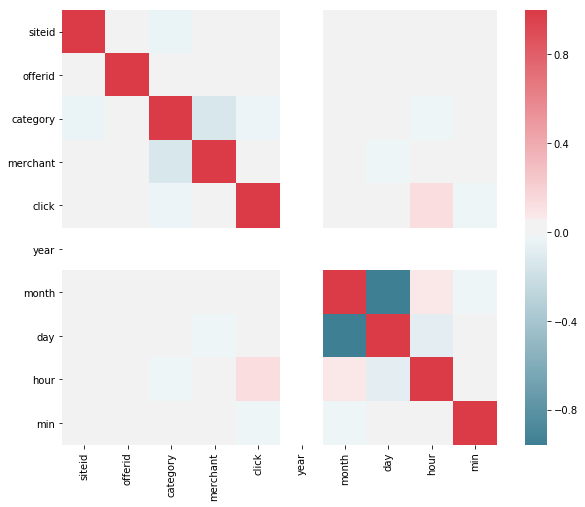

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
f, ax = plt.subplots(figsize=(10, 8))
corr = df_new.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [18]:
dummies =  pd.get_dummies(df_new,columns=['datetime','siteid','offerid','category','merchant','countrycode','browserid','devid'])
dummies.head()

,ID,click,year,month,day,hour,min,datetime_2017-01-13 00:00:00,datetime_2017-01-13 00:07:00,datetime_2017-01-13 00:17:00,...,browserid_IE,browserid_Internet Explorer,browserid_InternetExplorer,browserid_Mozilla,browserid_Mozilla Firefox,browserid_Opera,browserid_Safari,devid_Desktop,devid_Mobile,devid_Tablet
3615,IDGev7Hqh,0,2017,11,1,8,43,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1319,ID87IfZvC,1,2017,1,20,9,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4139,IDEoIlQ1b,0,2017,1,15,8,26,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3904,IDn1Kpx69,0,2017,1,16,14,22,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2330,IDVAYtRkn,1,2017,1,19,3,7,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [19]:
y = dummies['click']
final = dummies.drop(['ID','click'],axis='columns')
y.head()

3615    0
1319    1
4139    0
3904    0
2330    1
Name: click, dtype: int64

In [20]:
feature_cols=final.columns

print(feature_cols)

Index(['year', 'month', 'day', 'hour', 'min', 'datetime_2017-01-13 00:00:00',
       'datetime_2017-01-13 00:07:00', 'datetime_2017-01-13 00:17:00',
       'datetime_2017-01-13 01:07:00', 'datetime_2017-01-13 01:24:00',
       ...
       'browserid_IE', 'browserid_Internet Explorer',
       'browserid_InternetExplorer', 'browserid_Mozilla',
       'browserid_Mozilla Firefox', 'browserid_Opera', 'browserid_Safari',
       'devid_Desktop', 'devid_Mobile', 'devid_Tablet'],
      dtype='object', length=13294)


In [21]:
X= final[feature_cols]
print(X.head())
print("*********************************************************")
print(y.head())

      year  month  day  hour  min  datetime_2017-01-13 00:00:00  \
3615  2017     11    1     8   43                             0   
1319  2017      1   20     9    0                             0   
4139  2017      1   15     8   26                             0   
3904  2017      1   16    14   22                             0   
2330  2017      1   19     3    7                             0   

      datetime_2017-01-13 00:07:00  datetime_2017-01-13 00:17:00  \
3615                             0                             0   
1319                             0                             0   
4139                             0                             0   
3904                             0                             0   
2330                             0                             0   

      datetime_2017-01-13 01:07:00  datetime_2017-01-13 01:24:00  \
3615                             0                             0   
1319                             0                  

In [22]:
normalize_feature = preprocess.scale(final)
normalize_feature.shape

(5000, 13294)

# Splitting the dataset into training and testing set

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(4000, 13294)
(4000,)
(1000, 13294)
(1000,)


In [24]:
X_train.shape

(4000, 13294)

# Applying PCA 

In [25]:
k = 50 # (k is the number of components (new features) after dimensionality reduction)
my_pca = PCA(n_components = k)
X_Train_new = my_pca. fit_transform(X_train)
X_Test_new = my_pca. fit_transform(X_test)
print('X_train' , X_Train_new.shape)
print('X_test', X_Test_new.shape)


X_train (4000, 50)
X_test (1000, 50)


In [29]:
#a = my_pca.explained_variance_ratio_.sum() 
#print(a)

0.990139210770408


# Creating models using different Machine Learning Algorithms and fit them with Training data

In [26]:
dec_tree=DecisionTreeClassifier() 
log_reg=LogisticRegression()
k=3
knn=KNeighborsClassifier(n_neighbors=k)
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

In [27]:
log_reg.fit(X_train,y_train)
dec_tree.fit(X_train,y_train)
knn.fit(X_train,y_train)
my_RandomForest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

# testing the fit model on Training Set

In [28]:
y_perdict_regression =log_reg.predict(X_test)
y_perdict_tree =dec_tree.predict(X_test)
y_predict_knn= knn.predict(X_test)
predict_my_RandomForest=my_RandomForest.predict(X_test)

# Accuracy score of all the trained model

In [29]:
score_regression=accuracy_score(y_test,y_perdict_regression)
score_tree=accuracy_score(y_test, y_perdict_tree)
score_knn=accuracy_score(y_test, y_predict_knn)
my_RandomForest_accuracy=accuracy_score(y_test,predict_my_RandomForest)

print('Random Forest ',my_RandomForest_accuracy)
print('Logistic Regression',score_regression)
print('Decision Tree',score_tree)
print('KNN',score_knn)

Random Forest  0.897
Logistic Regression 0.895
Decision Tree 0.882
KNN 0.76


# True Positive and False Positive

In [30]:
from sklearn import metrics

fpr_reg, tpr_reg, thresholds_reg = metrics.roc_curve(y_test.ravel(), y_perdict_regression.ravel())
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_test.ravel(), y_predict_knn.ravel())
fpr_tree, tpr_tree, thresholds_tree = metrics.roc_curve(y_test.ravel(), y_perdict_tree.ravel())
fpr_rtree, tpr_rtree, thresholds_rtree = metrics.roc_curve(y_test.ravel(), predict_my_RandomForest.ravel())
print("LogisticRegression")
print(fpr_reg)
print(tpr_reg)
print("\n\n\n")
print("KNN")
print(fpr_knn)
print(tpr_knn)
print("\n\n\n")
print("Decision Tree")
print(fpr_tree)
print(tpr_tree)
print("\n\n\n")
print("Random Forest")
print(fpr_rtree)
print(tpr_rtree)

LogisticRegression
[0.         0.11642412 1.        ]
[0.         0.90558767 1.        ]




KNN
[0.         0.22037422 1.        ]
[0.         0.74181118 1.        ]




Decision Tree
[0.         0.13929314 1.        ]
[0.        0.9017341 1.       ]




Random Forest
[0.        0.0956341 1.       ]
[0.         0.89017341 1.        ]


In [31]:
# AUC:
AUC_reg = metrics.auc(fpr_reg, tpr_reg)
AUC_tree = metrics.auc(fpr_tree, tpr_tree)
AUC_knn = metrics.auc(fpr_knn, tpr_knn)
AUC_rtree = metrics.auc(fpr_rtree, tpr_rtree)
print("AUC Regression")
print(AUC_reg)
print("\n\n\n")
print("AUC Tree")
print(AUC_tree)
print("\n\n\n")
print("AUC KNN")
print(AUC_knn)
print("\n\n\n")
print("AUC Random Forest")
print(AUC_knn)

AUC Regression
0.8945817760846663




AUC Tree
0.8812204823765516




AUC KNN
0.7607184774814831




AUC Random Forest
0.7607184774814831


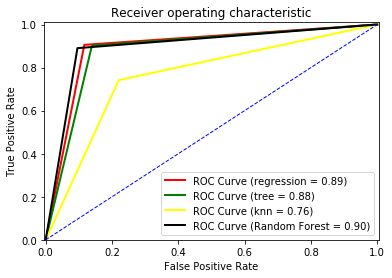

In [32]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_reg, tpr_reg, color='red', lw=2, 
         label='ROC Curve (regression = %0.2f)' % AUC_reg)

plt.plot(fpr_tree, tpr_tree, color='green', lw=2, 
         label='ROC Curve (tree = %0.2f)' % AUC_tree)

plt.plot(fpr_knn, tpr_knn, color='yellow', lw=2, 
         label='ROC Curve (knn = %0.2f)' % AUC_knn)

plt.plot(fpr_rtree, tpr_rtree, color='black', lw=2, 
         label='ROC Curve (Random Forest = %0.2f)' % AUC_rtree)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])


# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
print("\n\n\n")
plt.show()

In [33]:
from sklearn import metrics
import numpy as np

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_perdict_regression)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print(rmse)

0.324037034920393


# Plotting of Predicition and Target Label for Logistic Regression.

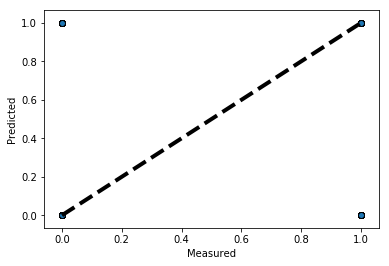

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
y_predict_ln = log_reg.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict_ln, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# cross - validation in sklearn
1. Logistic Regression


In [35]:
accuracy_list = cross_val_score(log_reg,X, y, cv=10, scoring='accuracy')

print(accuracy_list)

[0.914 0.888 0.89  0.912 0.908 0.888 0.894 0.912 0.904 0.886]


In [36]:
# use average of accuracy values as final result
accuracy_cv = accuracy_list.mean()
print("Orginial Accuracy",score_regression)
print("Cross-Validation Accuracy",accuracy_cv)

Orginial Accuracy 0.895
Cross-Validation Accuracy 0.8996000000000001


# 2. Decision Tree

In [37]:
#Cross-validation for Decision Tree

accuracy_list = cross_val_score(dec_tree, X, y, cv=10, scoring='accuracy')
print(accuracy_list)

[0.89  0.888 0.888 0.9   0.908 0.882 0.91  0.902 0.896 0.886]


In [38]:
accuracy_cv = accuracy_list.mean()

print("Orginial Accuracy ==>",score_tree)
print("Cross-Validation Accuracy ==>",accuracy_cv)

Orginial Accuracy ==> 0.882
Cross-Validation Accuracy ==> 0.8949999999999999


# 3. KNN

In [ ]:
#Cross-validation for KNN

accuracy_list = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(accuracy_list)

In [ ]:
accuracy_cv = accuracy_list.mean()

print("Orginial Accuracy ==>",score_knn)
print("Cross-Validation Accuracy ==>",accuracy_cv)

# 4.  Random Forest

In [72]:
#Cross-validation for Random Forest

accuracy_list = cross_val_score(my_RandomForest, X, y, cv=10, scoring='accuracy')
print(accuracy_list)

[0.902 0.904 0.908 0.914 0.902 0.886 0.914 0.932 0.9   0.868]


In [73]:
accuracy_cv = accuracy_list.mean()

print("Orginial Accuracy ==>",my_RandomForest_accuracy)
print("Cross-Validation Accuracy ==>",accuracy_cv)

Orginial Accuracy ==> 0.884
Cross-Validation Accuracy ==> 0.9030000000000001


# SVM Implementation

In [74]:
svm_model=svm.SVC(C=5, kernel='rbf', gamma=0.0005, random_state=1)
svm_model.fit(X_Train_new, y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
svm_predict=svm_model.predict(X_Test_new)
score_svm = accuracy_score(y_test, svm_predict)
print(score_svm)

0.88


In [76]:
from sklearn import metrics

confusion_svm = metrics.confusion_matrix(y_test, svm_predict)

print("Confusion matrix:")
print(confusion_svm)

Confusion matrix:
[[448  58]
 [ 62 432]]


In [77]:
# CV:
accuracy_list = cross_val_score(svm_model,X, y, cv=10, scoring='accuracy')

print(accuracy_list)

[0.888 0.904 0.912 0.906 0.908 0.882 0.914 0.928 0.908 0.884]


In [78]:
# use average of accuracy values as final result
accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

0.9034000000000001


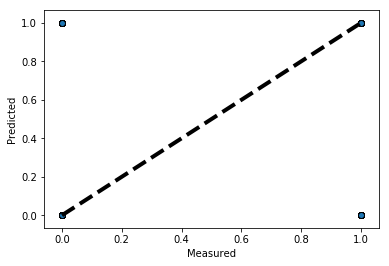

In [79]:
y_predict_ln = svm_model.predict(X_Test_new)
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict_ln, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [80]:
from sklearn import metrics
import numpy as np

# Calculating "Mean Square Error" (MSE):
mse2 = metrics.mean_squared_error(y_test, svm_predict)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse2 = np.sqrt(mse2)

print(rmse2)

0.34641016151377546
